## Observations and Insights 

In [64]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "C:/Users/Victor M Diaz/Resources/Bootcamp Matplotlib/MatplotLib Homework/data/Mouse_metadata.csv"
study_results_path = "C:/Users/Victor M Diaz/Resources/Bootcamp Matplotlib/MatplotLib Homework/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
CombineData_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
CombineData_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Include this line to make plots interactive
%matplotlib inline


In [66]:
# Checking the number of mice.
Num_mouse = CombineData_df["Mouse ID"].count()
Num_mouse

1893

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mouseID = CombineData_df[CombineData_df.duplicated(['Mouse ID', 'Timepoint'])]
Duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
All_mouseDataDuplicate_rows = CombineData_df[CombineData_df.duplicated(['Mouse ID',])]
All_mouseDataDuplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
Clean_df = CombineData_df.drop_duplicates("Mouse ID")
Clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Mean = CombineData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median = CombineData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance = CombineData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Standard_dv = CombineData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem = CombineData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
SummaryStats_df = pd.DataFrame({
                           "Mean": Mean, 
                           "Median": Median, 
                           "Variance": Variance, 
                           "Standard Deviation": Standard_dv, 
                           "SEM": Sem})
SummaryStats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

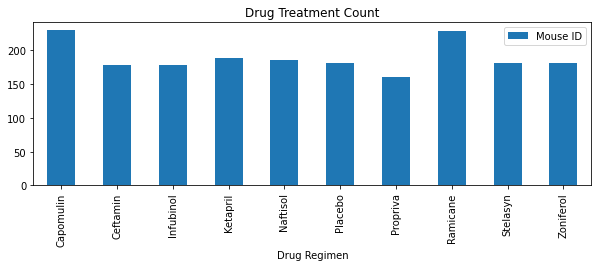

<Figure size 432x288 with 0 Axes>

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Micedrug_tested = pd.DataFrame(CombineData_df.groupby(["Drug Regimen"]).count()).reset_index()
Drugs_df = Micedrug_tested[["Drug Regimen", "Mouse ID"]]
Drugs_df = Drugs_df.set_index("Drug Regimen")

#Creating the bar chart
Drugs_df.plot(kind="bar", figsize=(10,3))
plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Drug_regimen = SummaryStats_df.index.tolist()
Drug_regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [73]:
# drug count into a list
DrugCount = (CombineData_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
DrugCount

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Count')

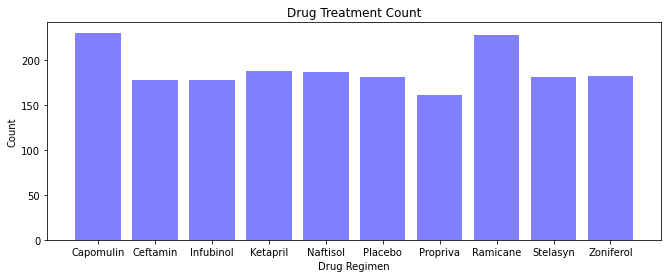

In [74]:
#Assign x-axis
x_axis = Drug_regimen
#Creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, DrugCount, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [75]:
plt.clf()
plt.cla()
plt.close()

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Micegender_df = pd.DataFrame(CombineData_df.groupby(["Sex"]).count()).reset_index()
Micegender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


Text(0, 0.5, '')

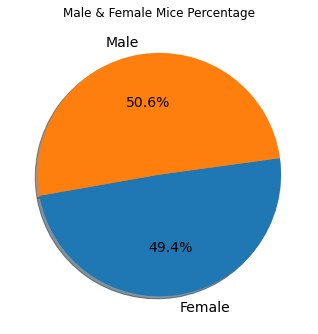

In [77]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
Micegender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=Micegender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [78]:
plt.clf()
plt.cla()
plt.close()

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Genderdistribution = (CombineData_df.groupby(["Sex"])["Age_months"].count()).tolist()
Genderdistribution

[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

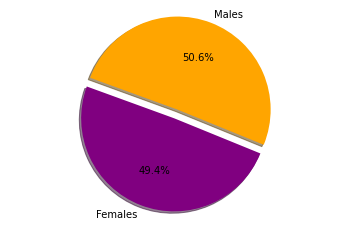

In [80]:
#Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)


#creating the pie chart
plt.pie(Genderdistribution, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

In [81]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

#Capomulin, Ramicane, Infubinol, and Ceftamin  
    
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [83]:
CombineData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
    #sort columns to: "Drug Regimen", "Mouse ID" and "Timepoint"
    SortColumns_df = CombineData_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
    Last_df = SortColumns_df.loc[SortColumns_df["Timepoint"] == 45]
    Last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [85]:
#---------------------------------- Capomulin data ------------------------------------------------------------
 #Grab data from "Capomulin" and reset index
CapomulinData_df = Last_df[Last_df["Drug Regimen"].isin(["Capomulin"])]
CapomulinData_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [86]:
 #Create a column "Tumor Volume (mm3)" 
Capomulin_obj = CapomulinData_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Capomulin_obj = Capomulin_obj["Tumor Volume (mm3)"]
Capomulin_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [87]:
# Calculate the Quartile 
Quartile = Capomulin_obj.quantile([.25,.5,.75])
Lowerq = Quartile[0.25]
Upperq = Quartile[0.75]
Iqr = Upperq - Lowerq

print(f"The lower quartile of temperatures is: {Lowerq}")
print(f"The upper quartile of temperatures is: {Upperq}")
print(f"The interquartile range of temperatures is: {Iqr}")
print(f"The median of temperatures is: {Quartile[0.5]}")

lower_bound = Lowerq - (1.5*Iqr)
upper_bound = Upperq + (1.5*Iqr)
print(f"Values for below {lower_bound} could be outliers.")
print(f"Values for above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values for below 20.70456164999999 could be outliers.
Values for above 51.83201549 could be outliers.


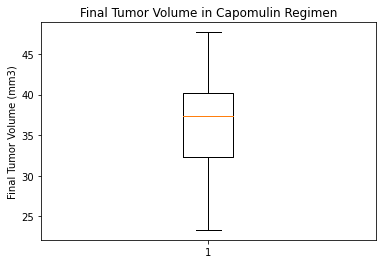

In [88]:
#Create box plot for Capomulin

fig1, ac1 = plt.subplots()
ac1.set_title("Final Tumor Volume in Capomulin Regimen")
ac1.set_ylabel("Final Tumor Volume (mm3)")
ac1.boxplot(Capomulin_obj)
plt.show()

In [89]:
#------------------------Ramicane-----------------------------

#Calculate Ramicane
RamicaneData_df = Last_df[Last_df["Drug Regimen"].isin(["Ramicane"])]
RamicaneData_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [90]:
#Make column "Tumor Volume (mm3)" a dataframe object
Ramicane_obj = RamicaneData_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Ramicane_obj = Ramicane_obj["Tumor Volume (mm3)"]
Ramicane_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [91]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Quartile = Ramicane_obj.quantile([.25,.5,.75])
Lower_quartile = Quartile[0.25]
Upper_quartile = Quartile[0.75]
Iqr = Upper_quartile - Lower_quartile

print(f"The lower quartile temperature is: {Lower_quartile}")
print(f"The upper quartile temperature is: {Upper_quartile}")
print(f"The interquartile range temperature is: {Iqr}")
print(f"The median temperatures is: {Quartile[0.5]}")

lower_bound = Lower_quartile - (1.5*Iqr)
upper_bound = Upper_quartile + (1.5*Iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile temperature is: 30.981175225
The upper quartile temperature is: 38.5083053075
The interquartile range temperature is: 7.527130082500001
The median temperatures is: 34.848627300000004
Values below 19.69048010125 could be outliers.
Values above 49.79900043125001 could be outliers.


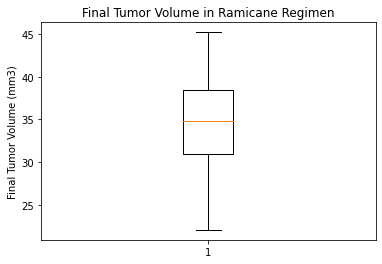

In [92]:
#Create Box plot for Ramicane
fig1, ar1 = plt.subplots()
ar1.set_title("Final Tumor Volume in Ramicane Regimen")
ar1.set_ylabel("Final Tumor Volume (mm3)")
ar1.boxplot(Ramicane_obj)
plt.show()

In [93]:
#-----------------------Infubinol-----------------------------------
#Calculate Ibufinol
Infubinol_df = Last_df[Last_df["Drug Regimen"].isin(["Infubinol"])]
Infubinol_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [94]:
#Make column "Tumor Volume (mm3)" a dataframe object
Infubinol_obj = Infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Infubinol_obj = Infubinol_obj["Tumor Volume (mm3)"]
Infubinol_obj

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [95]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Quartile = Infubinol_obj.quantile([.25,.5,.75])
Lower_quartile = Quartile[0.25]
Upper_quartile = Quartile[0.75]
Iqr = Upperq - Lowerq

print(f"The lower quartile of temperatures is: {Lower_quartile}")
print(f"The upper quartile of temperatures is: {Upper_quartile}")
print(f"The interquartile range of temperatures is: {Iqr}")
print(f"The median of temperatures is: {Quartile[0.5]}")

lower_bound = Lower_quartile - (1.5*Iqr)
upper_bound = Upper_quartile + (1.5*Iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 66.08306589
Values below 51.08165622 could be outliers.
Values above 79.35836381 could be outliers.


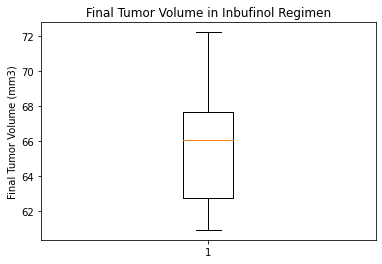

In [96]:
#Create Box plot for Inbufinol
fig1, aI1 = plt.subplots()
aI1.set_title("Final Tumor Volume in Inbufinol Regimen")
aI1.set_ylabel("Final Tumor Volume (mm3)")
aI1.boxplot(Infubinol_obj)
plt.show()

In [97]:
#-----------------------Ceftamin-----------------------------------
#Calculate Ceftamin
Ceftamin_df = Last_df[Last_df["Drug Regimen"].isin(["Ceftamin"])]
Ceftamin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [98]:
#Make column "Tumor Volume (mm3)" a dataframe object
Ceftamin_obj = Ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Ceftamin_obj = Ceftamin_obj["Tumor Volume (mm3)"]
Ceftamin_obj

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [99]:
# Calculate the data frame using pandas
Quartile = Ceftamin_obj.quantile([.25,.5,.75])
Lowerq = Quartile[0.25]
Upperq = Quartile[0.75]
Iqr = Upperq - Lowerq

print(f"The lower quartile of temperatures is: {Lowerq}")
print(f"The upper quartile of temperatures is: {Upperq}")
print(f"The interquartile range of temperatures is: {Iqr}")
print(f"The median of temperatures is: {Quartile[0.5]}")

lower_bound = Lowerq - (1.5*Iqr)
upper_bound = Upperq + (1.5*Iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The median of temperatures is: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


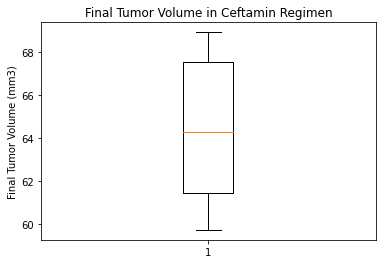

In [100]:
#Create Box plot for Ceftamin
fig1, aC1 = plt.subplots()
aC1.set_title("Final Tumor Volume in Ceftamin Regimen")
aC1.set_ylabel("Final Tumor Volume (mm3)")
aC1.boxplot(Ceftamin_obj)
plt.show()

In [101]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

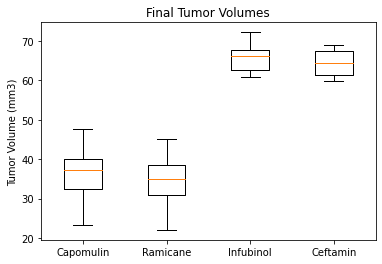

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

RegimentCombination_final = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([Capomulin_obj, Ramicane_obj, Infubinol_obj, Ceftamin_obj], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= RegimentCombination_final)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#--------------------Solve for Line Plot-------------------------------------------------------
CapomulinData_df = CombineData_df.loc[CombineData_df["Drug Regimen"] == "Capomulin"]
CapomulinData_df = CapomulinData_df.reset_index()
CapomulinData_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [103]:
#Grab Mouse ID
Capomulin_mouse = CapomulinData_df.loc[CapomulinData_df["Mouse ID"] == "s185"]
Capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

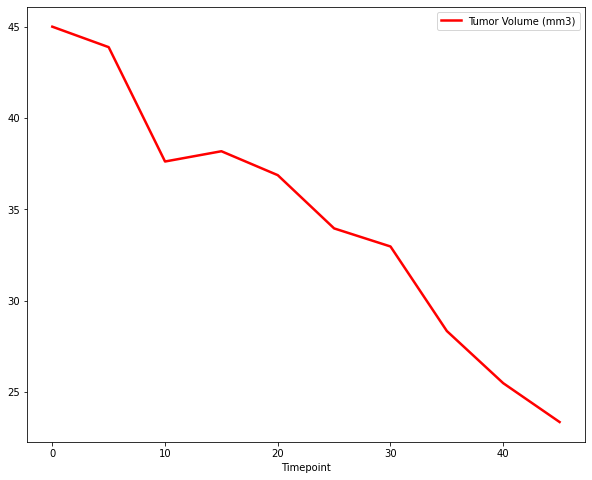

In [104]:
 #Arrange data    
Capomulin_mouse = Capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]


#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
Capomulin_mouse = Capomulin_mouse.reset_index(drop=True)
Capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

In [105]:
#-------------------------------Solve for Scatter plot----------------------------------------------------
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

CapomulinData_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [106]:
 #Arrange data 
Mouseweight_df = CapomulinData_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Mouseweight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [107]:
 # Find the average tumor volume
Capomulin_Avg = pd.DataFrame(Mouseweight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
Capomulin_Avg.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [108]:
#Change the name from "Tumor Volume (mm3)" to "Average Volume"
Capomulin_avg = Capomulin_avg.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
Capomulin_avg.head()

,Age_months,Weight (g),Timepoint,Average Volume,Metastatic Sites
Mouse ID,,,,,
b128,9,22,0,45.0,0
b742,7,21,0,45.0,0
f966,16,17,0,45.0,0
g288,3,19,0,45.0,0
g316,22,22,0,45.0,0


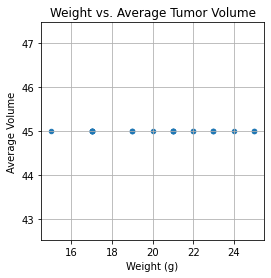

In [109]:
#Create scatter plot

Capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [111]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#-----------------------------Solve for Correlation---------------------------------------------------
Mouseweight = Capomulin_avg.iloc[:,0]
Volume_avg = Capomulin_avg.iloc[:,1]
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
Correlation = st.pearsonr(Mouseweight, Volume_avg)
print(f"The correlation for the two factors is {round(Correlation[0],2)}")

The correlation for the two factors is -0.07


In [114]:
#----------------------------------Solve for Regression----------------------------------

#Add linregress library
from scipy.stats import linregress

# Add the lineear regression equation line to the scatter plot
x_values = Capomulin_avg["Weight (g)"]
y_values = Capomulin_avg["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_num = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

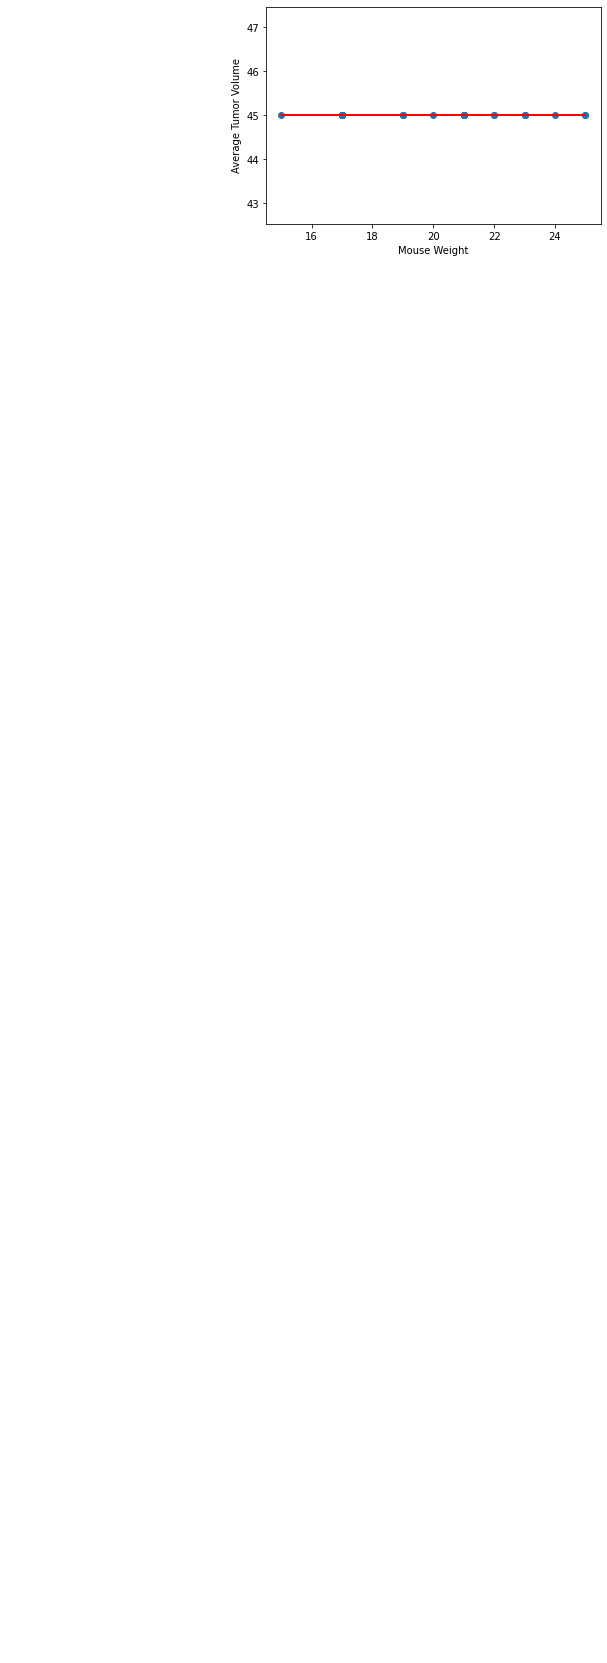

In [116]:
#Add scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values,Regress_num,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()